In [1]:
# This compares [Fe/H] as retrieved by our pipeline, and as found by nSSPP

# Created 2021 Dec. 5 by E.S.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
stem = "/Users/bandari/Documents/git.repos/rrlyrae_metallicity/"

rrlfe_results_file = "bin/retrieved_vals_test_20211203.csv"
nsspp_results_file = "notebooks_for_development/data/nSSPP82.out"
stacy_results_file = "notebooks_for_development/data/tloggfeoh2.dat"
phase_82_file = "notebooks_for_development/data/phase82.dat"

In [4]:
df_rrlfe = pd.read_csv(stem + rrlfe_results_file)
df_nsspp = pd.read_csv(stem + nsspp_results_file, delim_whitespace=True, 
                       names=["name","teff","logg","feh_nsspp","feh_beers"])
df_stacy = pd.read_csv(stem + stacy_results_file, delim_whitespace=True)
df_phase_82 = pd.read_csv(stem + phase_82_file, delim_whitespace=True, 
                          names = ["SDSSname", "hjd", "Sesar phase", "Sesar_cycles", "period", "g ephemeris", 
                                   "g amplitude", "Sesar type", "Drake phase", "Drake cycles", "Drake period", 
                                   "Drake V ephemeris", "Drake V amp", "Drake type", 
                                   "Drake2013b chart period", 
                                   "Drake2013b chart amp", 
                                   "Drake2013b chart type", 
                                   "Abbas2014 period", 
                                   "Abbas2014 amp", 
                                   "Abbas2014 type", 
                                   "Catalina DR2 chart period", 
                                   "Catalina DR2 chart amp", 
                                   "Catalina DR2 chart type", 
                                   "Drake MLS chart period", 
                                   "Drake MLS chart amp", 
                                   "Drake MLS chart type"])

In [5]:
# modify the right strings to compare among DataFrames

df_rrlfe["match_name"] = df_rrlfe["orig_spec_file_name"].str.split(".", expand = True, n=1)[0]
df_phase_82["82_match_name"] =  df_phase_82["SDSSname"].str.split(".", expand = True, n=1)[0]
df_rrlfe["match_name"] = df_rrlfe["match_name"].str.replace("g", "h")
df_phase_82["82_match_name"] = df_phase_82["82_match_name"].str.replace("G", "h")

In [6]:
df_rrlfe = df_rrlfe.rename(columns={"feh_retrieved": "rrlfe_feh_retrieved", 
                         "err_feh_retrieved": "rrlfe_err_feh_retrieved",
                         "teff_retrieved": "rrlfe_teff_retrieved"})
df_nsspp = df_nsspp.rename(columns={"teff": "nsspp_teff", "logg": "nsspp_logg"})

In [7]:
# merge them

df_merged = df_rrlfe.merge(df_nsspp, left_on="match_name", right_on="name")
df_merged_w82 = df_merged.merge(df_phase_82, left_on="match_name", right_on="82_match_name")

In [8]:
df_merged_w82.keys()

Index(['realization_spec_file_name', 'orig_spec_file_name', 'EW_Hbeta',
       'err_EW_Hbeta_from_robo', 'EW_Hdelta', 'err_EW_Hdelta_from_robo',
       'EW_Hgamma', 'err_EW_Hgamma_from_robo', 'EW_Heps',
       'err_EW_Heps_from_robo', 'EW_CaIIK', 'err_EW_CaIIK_from_robo',
       'EW_Balmer', 'err_EW_Balmer_based_Robo',
       'err_EW_Balmer_based_noise_churning', 'rrlfe_feh_retrieved',
       'rrlfe_err_feh_retrieved', 'rrlfe_teff_retrieved', 'match_name', 'name',
       'nsspp_teff', 'nsspp_logg', 'feh_nsspp', 'feh_beers', 'SDSSname', 'hjd',
       'Sesar phase', 'Sesar_cycles', 'period', 'g ephemeris', 'g amplitude',
       'Sesar type', 'Drake phase', 'Drake cycles', 'Drake period',
       'Drake V ephemeris', 'Drake V amp', 'Drake type',
       'Drake2013b chart period', 'Drake2013b chart amp',
       'Drake2013b chart type', 'Abbas2014 period', 'Abbas2014 amp',
       'Abbas2014 type', 'Catalina DR2 chart period', 'Catalina DR2 chart amp',
       'Catalina DR2 chart type', 'Drake 

In [9]:
df_merged.keys()

Index(['realization_spec_file_name', 'orig_spec_file_name', 'EW_Hbeta',
       'err_EW_Hbeta_from_robo', 'EW_Hdelta', 'err_EW_Hdelta_from_robo',
       'EW_Hgamma', 'err_EW_Hgamma_from_robo', 'EW_Heps',
       'err_EW_Heps_from_robo', 'EW_CaIIK', 'err_EW_CaIIK_from_robo',
       'EW_Balmer', 'err_EW_Balmer_based_Robo',
       'err_EW_Balmer_based_noise_churning', 'rrlfe_feh_retrieved',
       'rrlfe_err_feh_retrieved', 'rrlfe_teff_retrieved', 'match_name', 'name',
       'nsspp_teff', 'nsspp_logg', 'feh_nsspp', 'feh_beers'],
      dtype='object')

In [11]:
# focus on some relevant columns

## NOTE IM CHANGING df_merged_w82 -> df_master; MIGHT AS WELL, SINCE FORMER CONTAINS ALL I NEED

#df_master = df_merged[["match_name", "rrlfe_feh_retrieved", "rrlfe_err_feh_retrieved", "rrlfe_teff_retrieved", 
#                       "nsspp_teff", "feh_nsspp", "nsspp_logg"]].copy()
df_master = df_merged_w82[["match_name", "rrlfe_feh_retrieved", "rrlfe_err_feh_retrieved", "rrlfe_teff_retrieved", 
                       "nsspp_teff", "feh_nsspp", "nsspp_logg", "Drake phase", "Sesar phase", "Drake type", "Sesar type"]].copy()

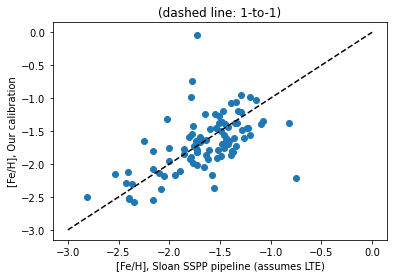

In [12]:
# color-code with Teff, logg

plt.plot([-3,0], [-3,0], linestyle = "--", color="k")
plt.scatter(df_master["feh_nsspp"], df_master["rrlfe_feh_retrieved"])
plt.xlabel("[Fe/H], Sloan SSPP pipeline (assumes LTE)")
plt.ylabel("[Fe/H], Our calibration")
plt.title("(dashed line: 1-to-1)")
plt.savefig("junk_feh.pdf")

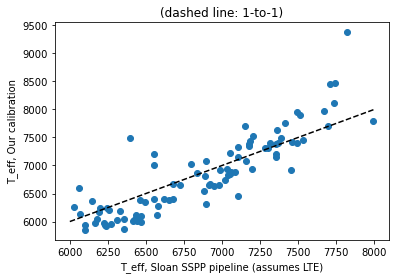

In [13]:
# color-code with [our] Fe/H, logg
# color-code with [nSSPP] Fe/H, logg

plt.plot([6000,8000], [6000,8000], linestyle = "--", color="k")
plt.scatter(df_master["nsspp_teff"], df_master["rrlfe_teff_retrieved"])
plt.xlabel("T_eff, Sloan SSPP pipeline (assumes LTE)")
plt.ylabel("T_eff, Our calibration")
plt.title("(dashed line: 1-to-1)")
plt.savefig("junk_teff.pdf")

In [ ]:
# seaborn code

'''
sns.set_theme(style="whitegrid")

# Load the example planets dataset
planets = sns.load_dataset("planets")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=planets,
    x="distance", y="orbital_period",
    hue="year", size="mass",
    palette=cmap, sizes=(10, 200),
)
g.set(xscale="log", yscale="log")
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)
'''

<Figure size 432x288 with 0 Axes>

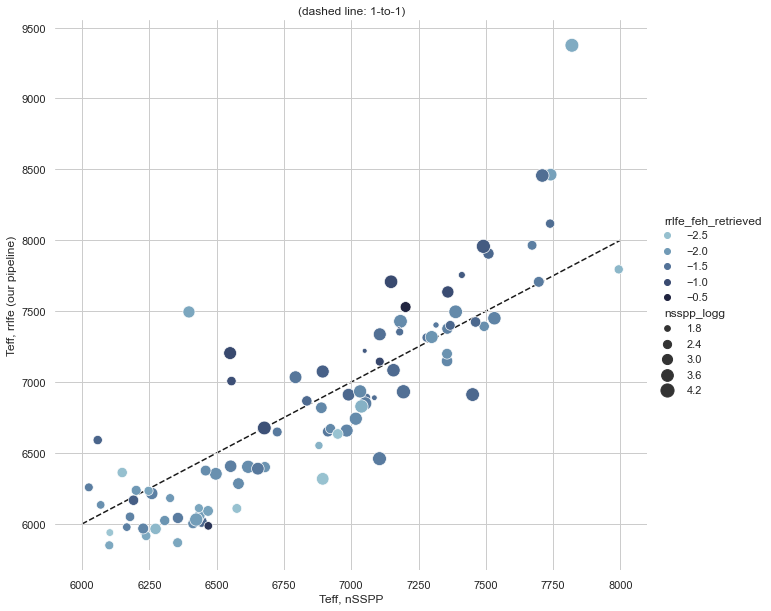

In [14]:
# color-code with [our] Fe/H, logg

plt.clf()

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_master,
    x="nsspp_teff", y="rrlfe_teff_retrieved",
    hue="rrlfe_feh_retrieved", hue_norm=(-3.0,-0.5), size="nsspp_logg",
    palette=cmap, sizes=(10, 200),
    height=8.27, aspect=1.1
)
plt.plot([6000,8000], [6000,8000], linestyle = "--", color="k",zorder=0)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("Teff, nSSPP")
g.ax.set_ylabel("Teff, rrlfe (our pipeline)")
g.despine(left=True, bottom=True)
g.ax.set_title("(dashed line: 1-to-1)")
g.despine(left=True, bottom=True)

plt.savefig("junk_teff_retrieved.pdf")

<Figure size 432x288 with 0 Axes>

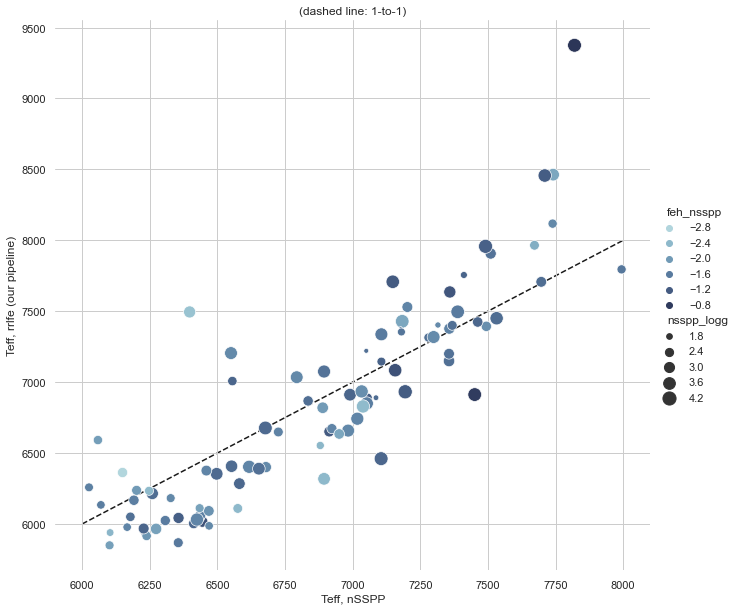

In [15]:
# color-code with [nSSPP] Fe/H, logg

plt.clf()

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_master,
    x="nsspp_teff", y="rrlfe_teff_retrieved",
    hue="feh_nsspp", hue_norm=(-3.0,-0.5), size="nsspp_logg",
    palette=cmap, sizes=(10, 200),
    height=8.27, aspect=1.1
)
plt.plot([6000,8000], [6000,8000], linestyle = "--", color="k",zorder=0)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("Teff, nSSPP")
g.ax.set_ylabel("Teff, rrlfe")
g.despine(left=True, bottom=True)
g.ax.set_ylabel("Teff, rrlfe (our pipeline)")
g.ax.set_title("(dashed line: 1-to-1)")

plt.savefig("junk_teff_retrieved.pdf")

<Figure size 432x288 with 0 Axes>

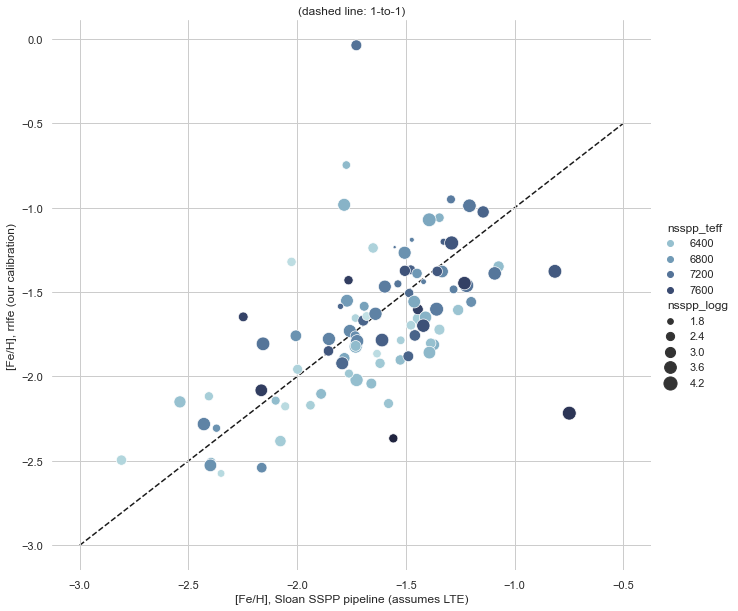

In [16]:
# color-code with [nSSPP] Fe/H, logg

plt.clf()

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_master,
    x="feh_nsspp", y="rrlfe_feh_retrieved",
    hue="nsspp_teff", hue_norm=(6000,8000), size="nsspp_logg",
    palette=cmap, sizes=(10, 200),
    height=8.27, aspect=1.1
)
plt.plot([-3.0,-0.5], [-3.0,-0.5], linestyle = "--", color="k",zorder=0)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("[Fe/H], Sloan SSPP pipeline (assumes LTE)")
g.ax.set_ylabel("[Fe/H], rrlfe (our calibration)")
g.despine(left=True, bottom=True)
g.ax.set_title("(dashed line: 1-to-1)")

plt.savefig("junk_feh_retrieved.pdf")

<Figure size 432x288 with 0 Axes>

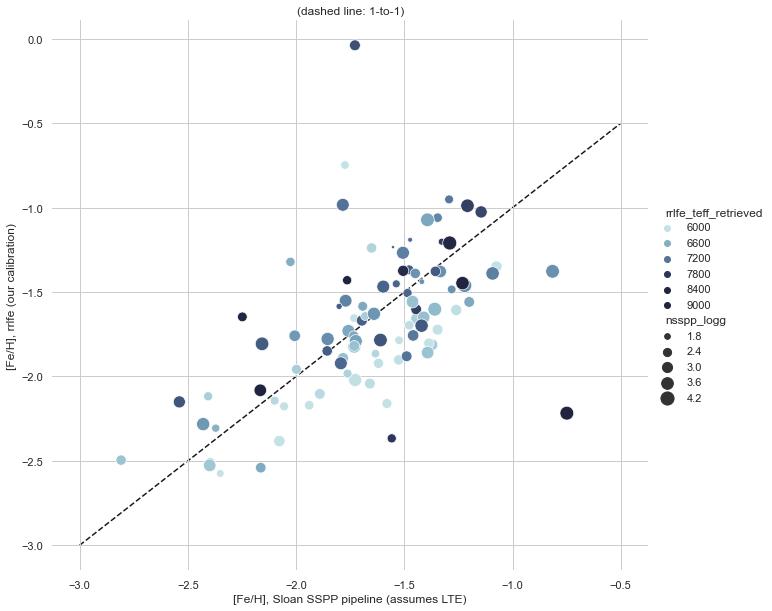

In [17]:
# color-code with [nSSPP] Fe/H, logg

plt.clf()

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_master,
    x="feh_nsspp", y="rrlfe_feh_retrieved",
    hue="rrlfe_teff_retrieved", hue_norm=(6000,8000), size="nsspp_logg",
    palette=cmap, sizes=(10, 200),
    height=8.27, aspect=1.1
)
plt.plot([-3.0,-0.5], [-3.0,-0.5], linestyle = "--", color="k",zorder=0)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("[Fe/H], Sloan SSPP pipeline (assumes LTE)")
g.ax.set_ylabel("[Fe/H], rrlfe (our calibration)")
g.despine(left=True, bottom=True)
g.ax.set_title("(dashed line: 1-to-1)")

plt.savefig("junk_feh_retrieved.pdf")

<Figure size 432x288 with 0 Axes>

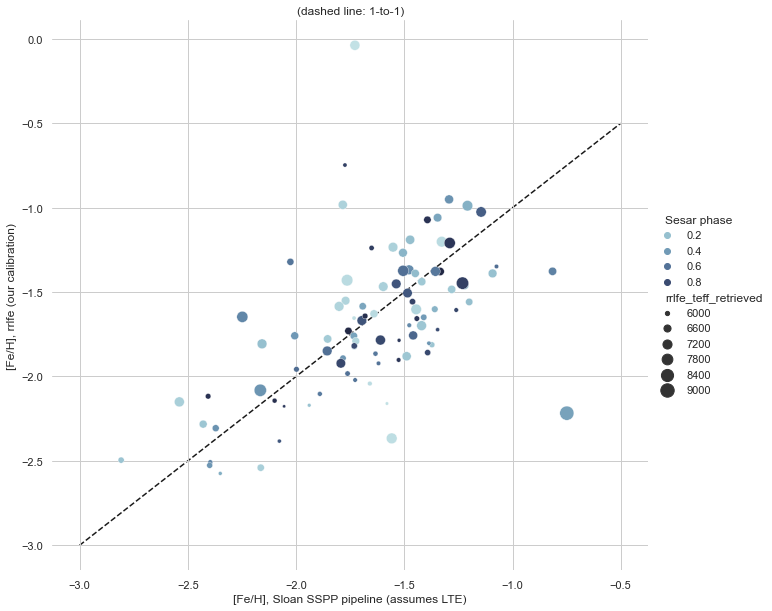

In [18]:
# Fe/H retrievals, color-coded phase

plt.clf()

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_master,
    x="feh_nsspp", y="rrlfe_feh_retrieved",
    hue="Sesar phase", hue_norm=(0.,1.), size="rrlfe_teff_retrieved",
    palette=cmap, sizes=(10, 200),
    height=8.27, aspect=1.1
)
plt.plot([-3.0,-0.5], [-3.0,-0.5], linestyle = "--", color="k",zorder=0)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("[Fe/H], Sloan SSPP pipeline (assumes LTE)")
g.ax.set_ylabel("[Fe/H], rrlfe (our calibration)")
g.despine(left=True, bottom=True)
g.ax.set_title("(dashed line: 1-to-1)")

plt.savefig("junk_feh_retrieved.pdf")

<Figure size 432x288 with 0 Axes>

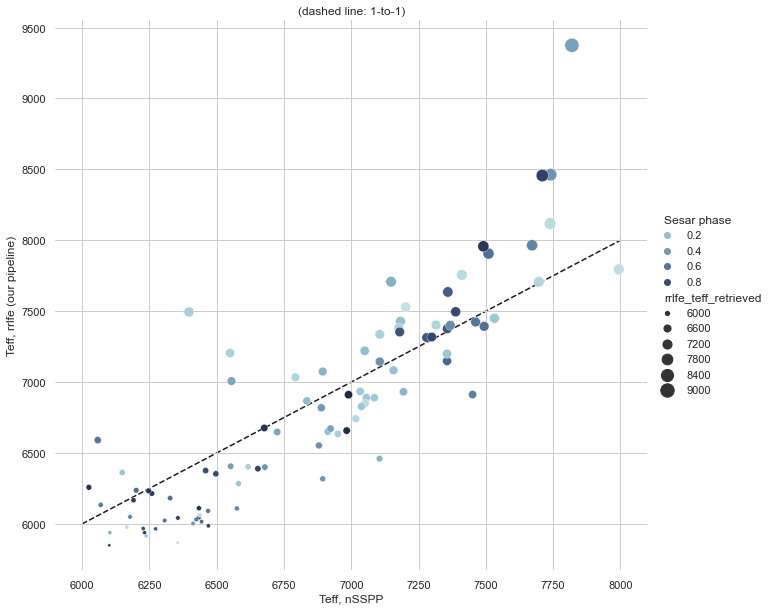

In [19]:
# color-code with [nSSPP] Fe/H, logg

plt.clf()

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_master,
    x="nsspp_teff", y="rrlfe_teff_retrieved",
    hue="Sesar phase", hue_norm=(0.,1.), size="rrlfe_teff_retrieved",
    palette=cmap, sizes=(10, 200),
    height=8.27, aspect=1.1
)
plt.plot([6000,8000], [6000,8000], linestyle = "--", color="k",zorder=0)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("Teff, nSSPP")
g.ax.set_ylabel("Teff, rrlfe")
g.despine(left=True, bottom=True)
g.ax.set_ylabel("Teff, rrlfe (our pipeline)")
g.ax.set_title("(dashed line: 1-to-1)")

plt.savefig("junk_teff_retrieved.pdf")

In [25]:
# make boolean type column: 0=ab, 1=c
df_master.loc[df_master["Sesar type"]  == "ab", "boolean_type"] = 0
df_master.loc[df_master["Sesar type"]  == "c", "boolean_type"] = 1

In [26]:
df_master

,match_name,rrlfe_feh_retrieved,rrlfe_err_feh_retrieved,rrlfe_teff_retrieved,nsspp_teff,feh_nsspp,nsspp_logg,Drake phase,Sesar phase,Drake type,Sesar type,boolean_type
0,spec-0371-52078-0324h002,-1.601213,0.011885,6460.040964,7105,-1.359,4.523,0.32796,0.2727,ab,ab,0.0
1,spec-0371-52078-0334h001,-1.606166,0.014424,6041.973515,6356,-1.260,3.360,0.08702,0.8264,ab,ab,0.0
2,spec-0371-52078-0334h002,-1.348249,0.015164,6015.605941,6444,-1.074,3.354,0.65998,0.6258,ab,ab,0.0
3,spec-0372-52173-0430h001,-1.025199,0.015774,7635.673869,7359,-1.145,3.783,9.99900,0.7063,NaN,c,1.0
4,spec-0374-51791-0010h001,-1.653877,0.014905,5977.241759,6166,-1.732,2.468,0.04622,0.0210,ab,ab,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
89,spec-3112-54802-0315h002,-1.921881,0.013378,6023.715049,6307,-1.619,3.007,0.51566,0.5940,ab,ab,0.0
90,spec-3143-54772-0191h001,-1.982607,0.012147,6181.777141,6327,-1.762,2.600,0.48095,0.6075,ab,ab,0.0
91,spec-3143-54772-0191h003,-1.818772,0.012084,6376.034124,6459,-1.731,3.220,0.80406,0.7982,ab,ab,0.0
92,spec-3143-54772-0191h004,-1.556759,0.012018,6389.425498,6653,-1.462,3.973,0.84513,0.8393,ab,ab,0.0


<Figure size 432x288 with 0 Axes>

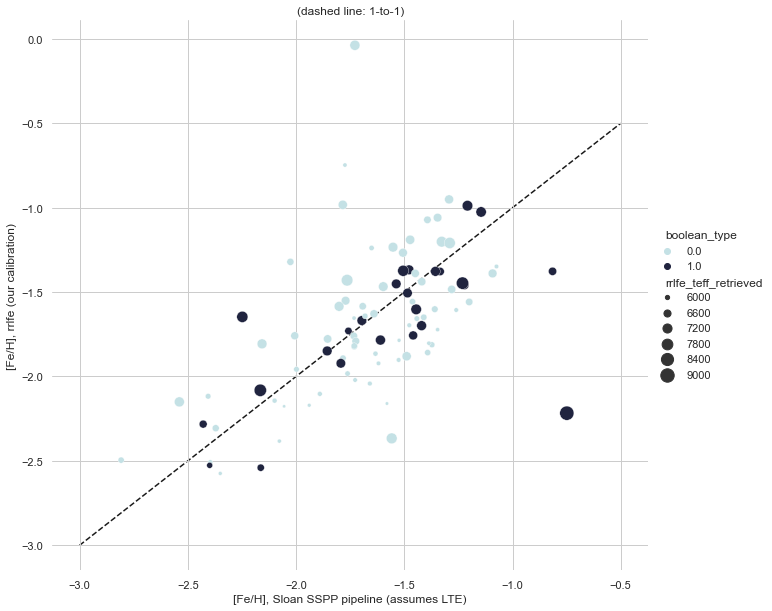

In [29]:
# Fe/H retrievals, color-coded phase

plt.clf()

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_master,
    x="feh_nsspp", y="rrlfe_feh_retrieved",
    hue="boolean_type", hue_norm=(0.,1.), size="rrlfe_teff_retrieved",
    palette=cmap, sizes=(10, 200),
    height=8.27, aspect=1.1
)
plt.plot([-3.0,-0.5], [-3.0,-0.5], linestyle = "--", color="k",zorder=0)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("[Fe/H], Sloan SSPP pipeline (assumes LTE)")
g.ax.set_ylabel("[Fe/H], rrlfe (our calibration)")
g.despine(left=True, bottom=True)
g.ax.set_title("(dashed line: 1-to-1)")

plt.savefig("junk_feh_retrieved.pdf")

<Figure size 432x288 with 0 Axes>

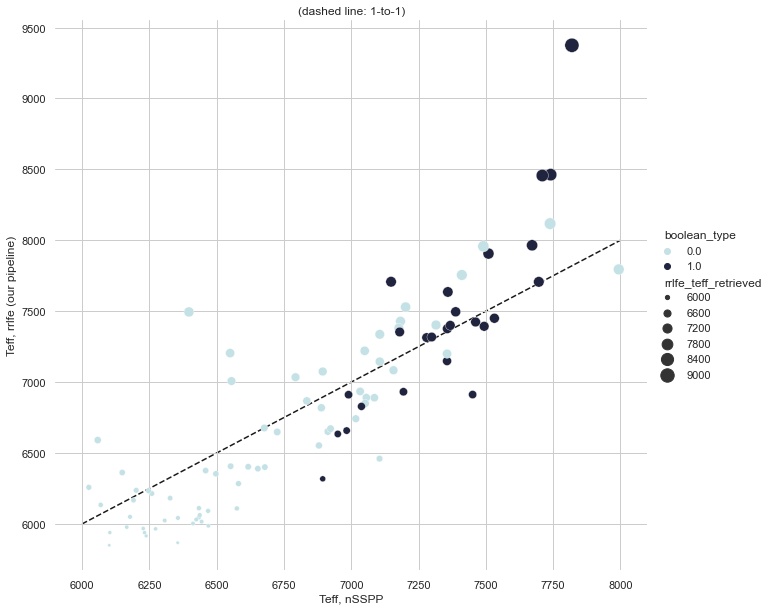

In [30]:
# color-code with [nSSPP] Fe/H, logg

plt.clf()

sns.set_theme(style="whitegrid")

cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=df_master,
    x="nsspp_teff", y="rrlfe_teff_retrieved",
    hue="boolean_type", hue_norm=(0.,1.), size="rrlfe_teff_retrieved",
    palette=cmap, sizes=(10, 200),
    height=8.27, aspect=1.1
)
plt.plot([6000,8000], [6000,8000], linestyle = "--", color="k",zorder=0)

g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.ax.set_xlabel("Teff, nSSPP")
g.ax.set_ylabel("Teff, rrlfe")
g.despine(left=True, bottom=True)
g.ax.set_ylabel("Teff, rrlfe (our pipeline)")
g.ax.set_title("(dashed line: 1-to-1)")

plt.savefig("junk_teff_retrieved.pdf")

In [31]:
len(df_master)

94

In [14]:
# check merging styles; what data are we blind to?

df_merged_left = df_rrlfe.merge(df_nsspp, how="left", left_on="match_name", right_on="name")
df_merged_right = df_rrlfe.merge(df_nsspp, how="right", left_on="match_name", right_on="name")
df_merged_outer = df_rrlfe.merge(df_nsspp, how="outer", left_on="match_name", right_on="name")
df_merged_inner = df_rrlfe.merge(df_nsspp, how="inner", left_on="match_name", right_on="name")

In [13]:
# check: how many rows are in each DataFrame?

print(len(df_rrlfe))
print(len(df_nsspp))
print(len(df_master))

2679
218
94


In [15]:
print(len(df_merged_left)) # all the 
print(len(df_merged_right))
print(len(df_merged_outer)) # stripe 82 stars + 
print(len(df_merged_inner))

2679
218
2803
94
